In [1]:
pip install pandas scikit-learn matplotlib


MSE: 0.0064537247621694405
Best Hyperparameters: {'n_estimators': 38, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 16, 'bootstrap': False}


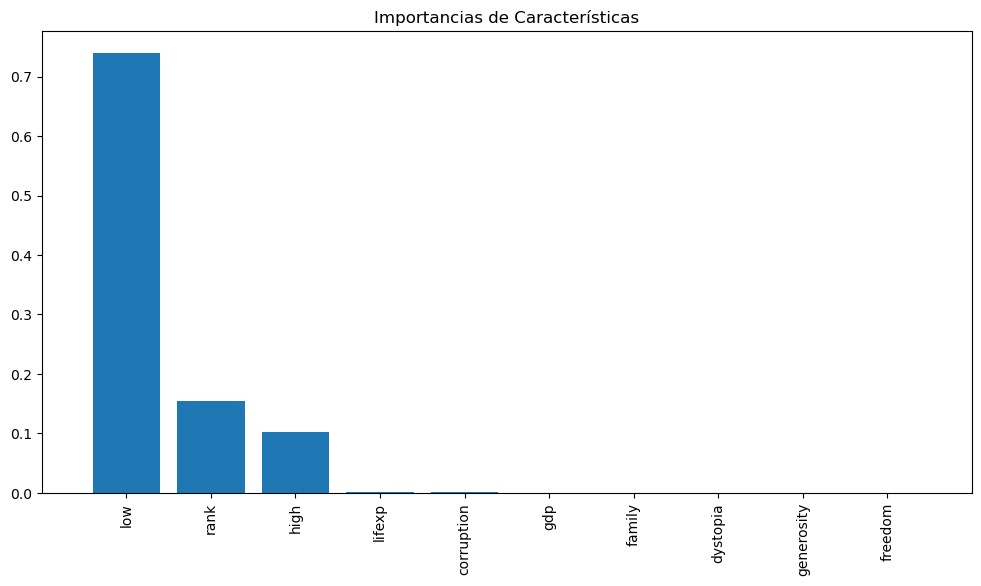

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Cargar el conjunto de datos
data = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/felicidad.csv')

# Eliminar columnas no numéricas o categóricas que no se pueden usar directamente en la regresión
data = data.select_dtypes(exclude=['object'])  # Excluir columnas no numéricas

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['score'])
y = data['score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de regresión (Random Forest)
regressor = RandomForestRegressor()

# Definir una grilla de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': [int(x) for x in range(10, 101)],
    'max_depth': [int(x) for x in range(1, 21)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_dist,
    n_iter=100,  # Número de combinaciones aleatorias a probar
    cv=5,  # Número de divisiones en la validación cruzada
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos del CPU para acelerar
    random_state=42
)

random_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_model = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mostrar el MSE y los mejores hiperparámetros
print(f'MSE: {mse}')
print(f'Best Hyperparameters: {random_search.best_params_}')

# Graficar las importancias de las características (Random Forest)
importances = best_model.feature_importances_
feature_names = X.columns
feature_indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancias de Características")
plt.bar(range(X.shape[1]), importances[feature_indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in feature_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos
data = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/felicidad.csv')

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['score'])
y = data['score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de regresión (Random Forest)
regressor = RandomForestRegressor()

# Definir una grilla de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': [int(x) for x in range(10, 101)],
    'max_depth': [int(x) for x in range(1, 21)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_dist,
    n_iter=100,  # Número de combinaciones aleatorias a probar
    cv=5,  # Número de divisiones en la validación cruzada
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos del CPU para acelerar
    random_state=42
)

random_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_model = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mostrar el MSE y los mejores hiperparámetros
print(f'MSE: {mse}')
print(f'Best Hyperparameters: {random_search.best_params_}')

# Graficar las importancias de las características si es aplicable (Random Forest)
if isinstance(best_model, RandomForestRegressor):
    importances = best_model.feature_importances_
    feature_names = X.columns
    feature_indices = importances.argsort()[::-1]

    plt.figure(figsize=(12, 6))
    plt.title("Importancias de Características")
    plt.bar(range(X.shape[1]), importances[feature_indices], align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in feature_indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()